$$ \textbf {Facultad de Matemáticas e Ingenierías}\\
 \textbf {Simulación}\\
 \textbf {Estudiante: Glenn Nicolás Rico Linares}\\
 \textbf {Grupo 51}\\
 \textbf {HW 4}$$

## 1. Monte Carlo Integration

$\bullet$ We learned in class about Monte Carlo Integration and in particular computed a similar integral to this one
$$ I = \int_{-1}^{1} e^{-x^{2}} \; dx \approx 1.49365$$

In [1]:
#Librerias
import math as m
import numpy as np
import sympy as sp
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import statistics as sta

In [2]:
def f(x):
    return np.exp(-x**2)

Valor, err = integrate.quad(lambda x: np.exp(-x**2), -1, 1)
print("Valor encontrado usando scipy ", Valor)
print("Error al usar scipy", err)

Valor encontrado usando scipy  1.493648265624854
Error al usar scipy 1.6582826951881447e-14


$-$ Plot the function in that interval and using the Monte Carlo method described in class, compute that integral for $N = 10000$. What value do you get?

Definimos los valores de integración y la cantidad n en los cuales se realizara el método de Monte Carlo 

In [3]:
a = -1
b = 1
n = 10000

In [4]:
def maxfunction(f,a,b):
    t=np.linspace(a,b,10000)
    y=f(t)
    return max(y)
def minfunction(f,a,b):
    t=np.linspace(a,b,10000)
    y=f(t)
    return min(y)
def monteCarlo2(a,b,n,f):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

    maxf=maxfunction(f,a,b)
    minf=minfunction(f,a,b)
    minf=0
    xrand=np.random.rand(n)*(b-a)+a
    yrand=np.random.rand(n)*(maxf-minf)+minf
    cont=0
    x=np.linspace(a,b,1000)
    axes[0, 0].plot(x,f(x),color="#000000")
    axes[0, 0].set_title("Integral con método de Monte Carlo")
    axes[0, 0].set_xlabel("$x$")
    axes[0, 0].set_ylabel("$y$")
    
    axes[0, 1].fill_between(x,f(x), alpha = 0.8, color = "#0011FF")
    axes[0, 1].set_title("Área bajo la curva de la función")
    axes[0, 1].plot(x,f(x),color="#000000")  
    axes[0, 1].set_xlabel("$x$")
    axes[0, 1].set_ylabel("$y$")   
    
    axes[1, 0].remove()
    axes[1, 1].remove()
    
    for i in range(len(xrand)):
        if(f(xrand[i])>=yrand[i]):
            cont=cont+1
            axes[0, 0].scatter(xrand[i],yrand[i],color="#0011FF")
        else:
            axes[0, 0].scatter(xrand[i],yrand[i],color="#FF0000")
    return (b-a)*(maxf-minf)*cont/n


1.491799985079016

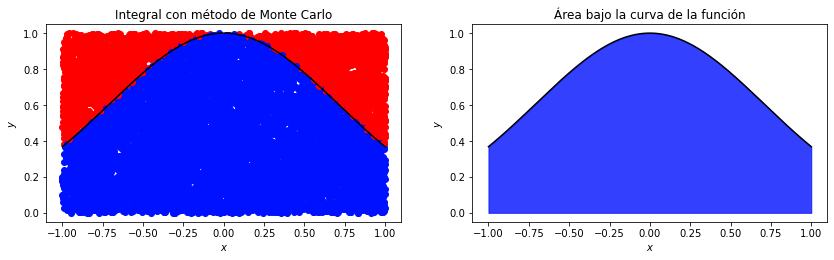

In [5]:
monteCarlo2(a,b,n,f)

$-$  What is the error of this method? How do you compute it?

Primero voy a ver como se comporta el resultado de la integral al realizar el método $10000$ veces, y despues cularé la varianza usando una función de numpy la cual es $np.var(arreglo1)$ y usando la libreria $statistics$, para así calcular el error.

Para saber el error del método debesmo hallar la varianza de los datos, y la haremos de la siguiente forma.

#### Pasos para calcular el error
$i)$ Calcular la varianza del los valores al ser evaluados en la función.

$ii)$ multiplicar ese valor por $\frac{1}{\sqrt{n}}$.

Y así obtendremos el error del método

In [6]:
def monteCarlo(a,b,n,f):
    maxf=maxfunction(f,a,b)
    minf=0
    xrand=np.random.rand(n)*(b-a)+a
    yrand=np.random.rand(n)*(maxf-minf)+minf
    cont=0
    for i in range(len(xrand)):
        if(f(xrand[i])>=yrand[i]):
            cont=cont+1
    return (b-a)*(maxf-minf)*cont/n

In [7]:
arreglo1=np.array([])
n = 10000

for i in range(n):
    arreglo1 = np.append(arreglo1,monteCarlo(a,b,n,f))

In [8]:
def media(n,x):
    media = 0
    for i in range(len(x)):
        media += x[i]
    media = media/n
    return media

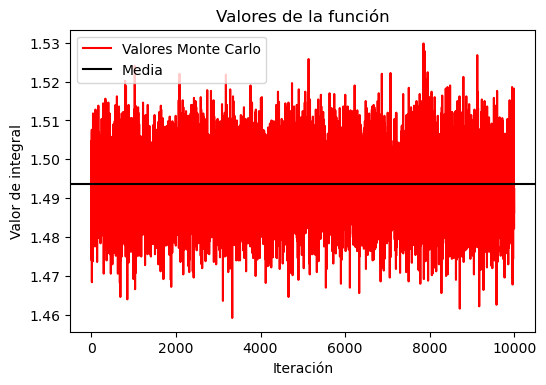

In [9]:
plt.figure(dpi=100)
plt.title("Valores de la función")
plt.plot(arreglo1, color="#FF0000",label= "Valores Monte Carlo" )
plt.axhline(media(n,arreglo1), color= "#000000", label= "Media")

plt.legend()
plt.xlabel("Iteración")
plt.ylabel("Valor de integral")
plt.show()

Observamos en la grafica anterior una iteración del método $10000$ veces y se gráfica el varlor que se obtuvo para unir así todos los resultados, además, se gráfica la media de los valores obtenidos de color negro para terner una referencia respecto a la varianza. 

Ahora, vamos a calcular la varianza de los datos en el $arreglo1$ co la función $sta.variance$

In [10]:
var = sta.variance(arreglo1,sta.mean(arreglo1))
var

7.571060226546308e-05

Con la varianza obtenida la cual se evidencia en al recuadro anterior, sabemos que los resultados de iterar el método $10000$ veces y saber como se comportan respecto a la media, y se observa que estan en rango

Ahora calcularemos la varianza para un valores aleatorios en espefifico y lo haremos de la siguiente forma.

Definimos una función llamada varianza, con la cual calcularemos la varianza.

In [11]:
def Varianza(a,b,n,f):
    v = 0
    media = 0
    
    xrand=np.random.rand(n)*(b-a)+a
    
    for i in range(len(xrand)):
        media += f(xrand[i])
    media = media/n
    
    for i in range(len(xrand)):
        v += (f(xrand[i])-media)**2
    v = (m.sqrt(v)/m.sqrt(n))

    print("Varinza es",v)
    return v

In [12]:
varianza = Varianza(a,b,n,f)
varianza

Varinza es 0.20130421202177287


0.20130421202177287

Ya que tenemos la varianza ahora lo multiplicaremos por $\frac{1}{\sqrt{n}}$ y así obtenemos el error.

In [13]:
error = varianza/m.sqrt(n)
print("El error obtenido es",error)

El error obtenido es 0.0020130421202177286


$-$ Compare the error found with other approaches, like the midpoint , trapezoidal, quadratures, Simpson, etc. Is this method better or worst? If the integral were in eight dimensions, which method would be better? Prove it

### Midpoint

In [14]:
h = (b-a)/n
r1 = np.linspace(a,b,n)
suma = 0
for i in range(3-1):
    media = (r1[i]+r1[i+1])/2
    suma += np.exp(-(media)**2)
VmidP = h*suma
print('Integral: ', VmidP)



Integral:  0.00014721065042351032


### The Trapezoidal Rule

In [15]:
h = (b-a)/n
x = a

suma = f(x)

for i in range(n):
    x = x+h
    suma = suma + 2*f(x)

suma = suma + f(b)
area = h*(suma/2)

print('Integral: ', area)


Integral:  1.4937218366080742


Para saber el error de este método debemos realizar la siguiente opereción
$$
{\displaystyle E_{t}=-{\frac {1}{12}}f''(\xi )(b-a)^{3}}
$$
Siendo ${\displaystyle \xi }$ un número pertenece al intervalo $[a,b]$.

In [16]:
x = sp.Symbol('x')

D4 = sp.diff(sp.exp(-x**2), x,2)
D4

2*(2*x**2 - 1)*exp(-x**2)

In [17]:
error = -((1)/(12))*(2*(2*(0.8)**2 - 1)*sp.exp(-(0.8)**2))*(b-a)**3
np.abs(error)

0.196855838309405

Por lo que obtenemos un error de 0.196855838309405 que es mayor al error obtenido en Monte Carlo.

### Simpson's Rule

In [18]:
h = (b-a)/n
suma = 0

for i in range(n):
    b = a + h
    m = (a+b)/2
    area = ((b-a)/6)*(f(a) + 4*f(m) + f(b))
    suma = suma + area
    a = b
print('Integral: ', suma)

Integral:  1.4936482656247985


Para saber el error de este método debemos realizar la siguiente opereción
$$
{\displaystyle E(f)=-{\frac {h^{5}}{90}}\,f^{(4)}(\xi )}
$$
donde ${\displaystyle h=\frac{(b-a)}{2}}$ y ${\displaystyle \xi }$  pertenece al intervalo $[a,b]$.

In [19]:
x = sp.Symbol('x')

D4 = sp.diff(sp.exp(-x**2), x,4)
D4

4*(4*x**4 - 12*x**2 + 3)*exp(-x**2)

In [20]:
h = (b-a)/2
error = -((h**5)/(90))*(4*(4*(0.8)**4 - 12*(0.5)**2 + 3)*sp.exp(-(0.8)**2))
np.abs(error)

0

Por lo que obtenemos un error de 0.0383962625578725 que es mayor al error obtenido en Monte Carlo.

Se observa que el error obtenido por el método de Monte Carlo es mucho menor a los demas metodos, por lo cual se infiere que el método tiene un valor con menor error, y se puede hacer la hipótesis de que esto ocurre en cualquier caso. 